In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
a_df = pd.read_csv(r"C:\Users\aryan computer\Downloads\1632560262896716.csv")
a_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = a_df.drop('Gender',axis=1)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [4]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
clus = StandardScaler().fit_transform(X)
clus

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 8)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [6]:
df["cluster_km"] = labels
df.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster_km
0,1,19,15,39,4
1,2,21,15,81,3
2,3,20,16,6,4
3,4,23,16,77,3
4,5,31,17,40,4


In [9]:
X = df.values[:,1:]

In [11]:
km_df = df.groupby("cluster_km").mean()
km_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
cluster_km,,,,
0,85.737500,42.937500,55.087500,49.712500
1,162.000000,32.692308,86.538462,82.128205
2,163.500000,40.666667,87.750000,17.583333
3,23.090909,25.272727,25.727273,79.363636
4,23.000000,45.217391,26.304348,20.913043


In [12]:
x = km_df.values[:,1:] #center of each cluster

In [13]:
df = df.sort_values("cluster_km")
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster_km
99,100,20,61,49,0
85,86,48,54,46,0
84,85,21,54,57,0
83,84,46,54,44,0
82,83,67,54,41,0


In [35]:
df['cluster_km']==0


99     True
85     True
84     True
83     True
82     True
      ...  
18    False
16    False
14    False
10    False
0     False
Name: cluster_km, Length: 200, dtype: bool

In [36]:
x0 = df[df['cluster_km'] == 0]

In [37]:
x0

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster_km
99,100,20,61,49,0
85,86,48,54,46,0
84,85,21,54,57,0
83,84,46,54,44,0
82,83,67,54,41,0
...,...,...,...,...,...
53,54,59,43,60,0
54,55,50,43,45,0
47,48,27,40,47,0
56,57,51,44,50,0


In [39]:
X0 = x0.values[:,1:]

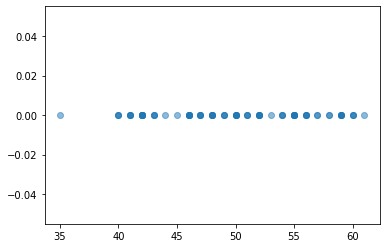

In [54]:
plt.scatter(X0[:, 2], X0[:, 3], alpha=0.5) 
#this garph shows the person who has mean annual income of 55 and mean spending score of 49.7


Text(0, 0.5, 'Spending Score (1-100)')

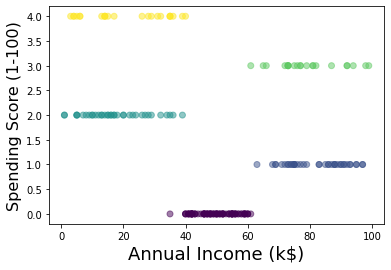

In [55]:
plt.scatter(X[:, 2], X[:, 3], c=labels, alpha=0.5)
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)

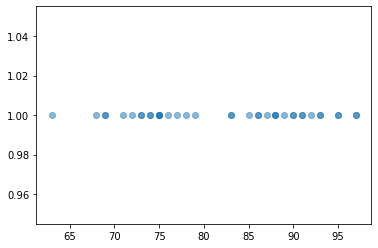

In [58]:
x1 = df[df['cluster_km'] == 1]
X1 = x1.values[:,1:]
plt.scatter(X1[:, 2], X1[:, 3], alpha=0.5) 
#this garph shows the person who has mean annual income of 86 and mean spending score of 82

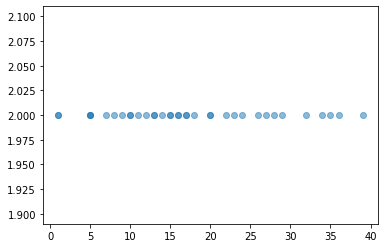

In [59]:
x2 = df[df['cluster_km'] == 2]
X2 = x2.values[:,1:]
plt.scatter(X2[:, 2], X2[:, 3], alpha=0.5) 
#this garph shows the person who has mean annual income of 87.7 and mean spending score of 17

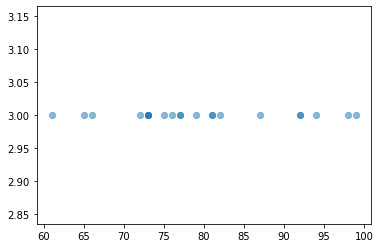

In [62]:
x3 = df[df['cluster_km'] == 3]
X3 = x3.values[:,1:]
plt.scatter(X3[:, 2], X3[:, 3], alpha=0.5) 
#this garph shows the person who has mean annual income of 25 and mean spending score of 79

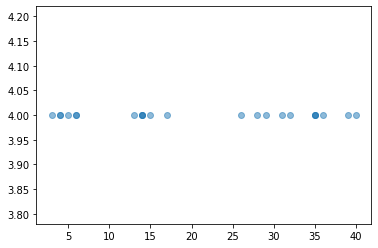

In [63]:
x4 = df[df['cluster_km'] == 4]
X4 = x4.values[:,1:]
plt.scatter(X4[:, 2], X4[:, 3], alpha=0.5) 
#this garph shows the person who has mean annual income of 26 and mean spending score of 20